# Projekt zaliczeniowy - Kwantowe uczenie maszynowe
## Przewidywanie ryzyka kredytowego - porównanie podejścia kwantowego i klasycznego
### Emilia Matrejek 100916

#### Cel biznesowy
Projekt ma na celu stworzenie modelu przewidującego ryzyko kredytowe na podstawie danych demograficznych, finansowych i dotyczących sytuacji mieszkaniowej klienta. Model będzie wykorzystywał technologie kwantowe. Dla porównania zostanie również zbudowany klasyczny model, a następnie zostanie porównana efektywność między podejściem kwantowym, a klasycznym.

#### Typ procesu i modelu
1.	Typ procesu: klasyfikacja binarna (1 – ryzykowny klient; 0 – bezpieczny klient)
2.	Modele
   - .	Quantum S
   - b.	Klasyczny model referencyjny – logistic regression lub random forest


#### Klasyczne EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ładuję zbiór danych:

In [8]:
df = pd.read_csv(r'C:\Users\ematrejek\Desktop\studia\Loan Data.csv', sep = ';')
df.head()

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wyświetlam listę zmiennych:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOB     1225 non-null   float64
 1   NKID    1225 non-null   float64
 2   DEP     1225 non-null   float64
 3   PHON    1225 non-null   int64  
 4   SINC    1225 non-null   float64
 5   AES     1225 non-null   object 
 6   DAINC   1225 non-null   float64
 7   RES     1225 non-null   object 
 8   DHVAL   1225 non-null   float64
 9   DMORT   1225 non-null   float64
 10  DOUTM   1225 non-null   float64
 11  DOUTL   1225 non-null   float64
 12  DOUTHP  1225 non-null   float64
 13  DOUTCC  1225 non-null   float64
 14  BAD     1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB


Zbiór danych składa się z 15 kolumn oraz 1225 wierszy.
12 zmiennych to zmienne zmiennoprzecinkowe, 1 to zmienna zero-jedynkowa (zmienna "PHON"), a dwie to zmienne kategorialne.

Poniżej przedstawiam opis poszczególnych zmiennych:
- YOB - "year of birth" - chociaż rozkład zmiennej wskazuje bardziej na to, że jest to wiek respondenta,
- NKID - liczba dzieci
- DEP - liczba innych osób zależnych od respondenta,
- PHON - 1 jeśli znajduje się telefon domowy; 0 jeśli nie
- SINC - dochód małżonka (w dolarach)
- AES - status zatrudnienia (V - Government, W - housewife, M - military, P - private sector, B - public sector, R - retired, E - self employed, T - student, U - unemployed, N - others, Z - no response)
- DAINC - dochód respondenta (w dolarach)
- RES - status zamieszkania (O - owner, F - tenant furnished, U - tenant unfurnished, P - with parents, N - other, Z - no response)
- DHVAL - wartość domu (według dokumentacji - 0 - brak odpowiedzi albo nie jest właścicielem, blank - no response) (w dolarach)
- DMORT - saldo kredytu hipotecznego niespłaconego (według dokumentacji - 0 - brak odpowiedzi albo nie jest właścicielem; blank - no response) (w dolarach)
- DOUTM - wydatki na kredyt hipoteczny lub czynsz (w dolarach)
- DOUTL - wydatki na pożyczki (w dolarach)
- DOUTHP - wydatki na zakupy ratalne (w dolarach)
- DOUTCC - wydatki na karty kredytowe (w dolarach)
- BAD - zmienna celu: przyjmuje wartość 1 jeśli klient jest ryzykowny lub 0 jeśli jest "bezpieczny"


In [14]:
df.describe()

,YOB,NKID,DEP,PHON,SINC,DAINC,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,51.037551,0.623673,0.038367,0.903673,1990.084898,21244.211429,15693.857959,11225.691429,342.004898,121.926531,28.721633,39.595102,0.263673
std,15.301818,1.016013,0.219917,0.295159,4802.341425,15896.207986,20736.331833,18889.207107,427.993865,839.639588,119.324084,168.697101,0.440804
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,19500.000000,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,1.000000,1040.000000,30600.000000,28928.000000,20000.000000,528.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,5.000000,2.000000,1.000000,50000.000000,64800.000000,64928.000000,64000.000000,3800.000000,28000.000000,1600.000000,2800.000000,1.000000


W kolejnym kroku zajmę się oczyszczaniem danych:
- zmienna YOB zawiera nienaturalne wartości - maksimum to 99, a minimum to 3; potraktuję wartości z przedziału 3-18 oraz {99} jako braki danych i zastąpię je medianą
- w zmiennych DHVAL oraz DMORT zera zamienię na wartości 'null' - aby były traktowane jako braki danych (zgodnie z dokumentacją)
- w zmiennej SINC zero również zamienię na wartość brakującą, ponieważ najprawdopodobniej zera oznaczają brak małżonka

In [17]:
valid_yob = df[(df['YOB'] >= 19) & (df['YOB'] < 99)]['YOB']
median_yob = valid_yob.median()

# Zastąpienie wartości z przedziału 3-18 oraz 99 medianą
df['YOB_CLEANED'] = df['YOB'].apply(lambda x: median_yob if (x <= 18 or x == 99) else x)

# Podsumowanie po zmianie
yob_summary = df['YOB_CLEANED'].describe()
median_yob, yob_summary

(55.0,
 count    1225.000000
 mean       52.466939
 std        12.690796
 min        19.000000
 25%        45.000000
 50%        55.000000
 75%        63.000000
 max        69.000000
 Name: YOB_CLEANED, dtype: float64)

In [19]:
df['DHVAL'] = df['DHVAL'].replace(0, np.nan)
df['DMORT'] = df['DMORT'].replace(0, np.nan)
df['SINC'] = df['SINC'].replace(0, np.nan)

# Podsumowanie braków danych po transformacji
missing_summary = df[['DHVAL', 'DMORT', 'SINC']].isnull().sum()
missing_summary

DHVAL    631
DMORT    709
SINC     908
dtype: int64

Teraz przejdę do wizualizacji i statystyk opisowych

C:\Users\ematrejek\AppData\Local\Temp\ipykernel_33208\2975194750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BAD', data=df, palette='Paired')


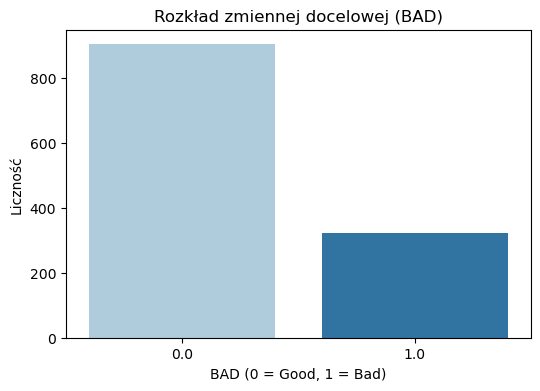

In [22]:


plt.figure(figsize=(6, 4))
sns.countplot(x='BAD', data=df, palette='Paired')
plt.title('Rozkład zmiennej docelowej (BAD)')
plt.xlabel('BAD (0 = Good, 1 = Bad)')
plt.ylabel('Liczność')
plt.show()

In [23]:
numeric_cols = ['YOB_CLEANED', 'NKID', 'DEP', 'PHON', 'SINC', 'DAINC', 'DHVAL', 'DMORT', 'DOUTM', 'DOUTL', 'DOUTHP', 'DOUTCC']


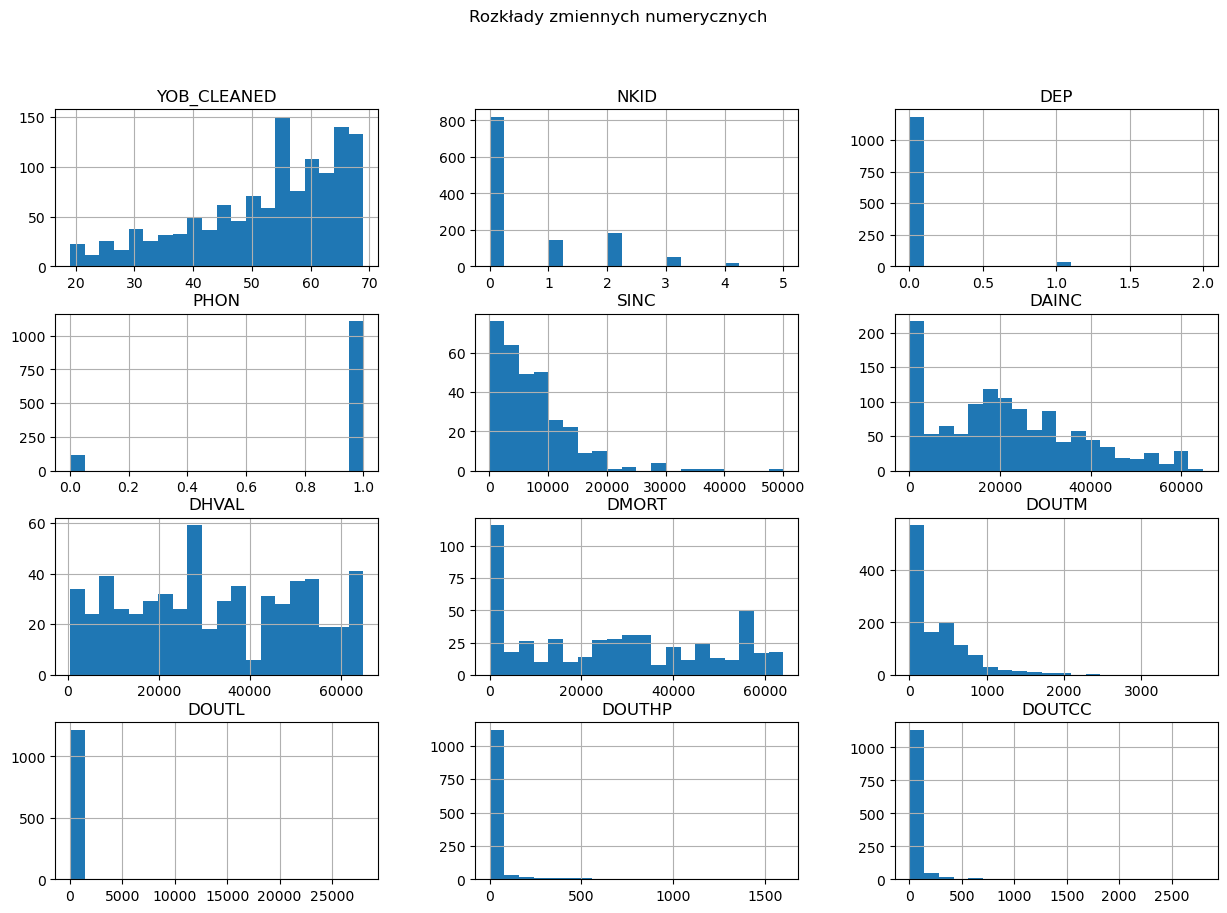

In [26]:
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Rozkłady zmiennych numerycznych')
plt.show()

C:\Users\ematrejek\AppData\Local\Temp\ipykernel_33208\4203975336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='AES', data=df, order=df['AES'].value_counts().index, palette = 'Paired')


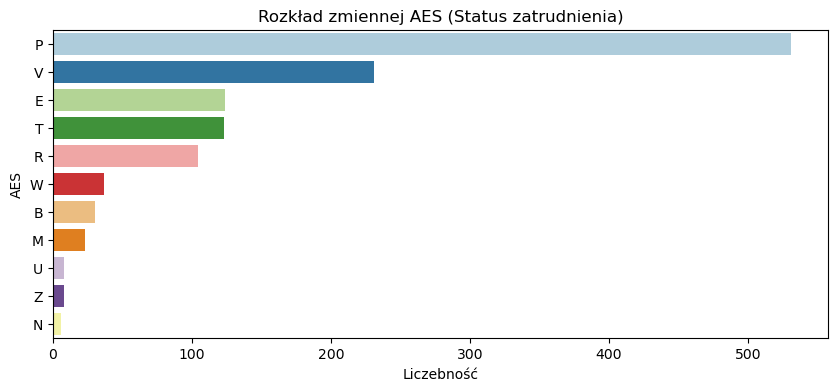

C:\Users\ematrejek\AppData\Local\Temp\ipykernel_33208\4203975336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='RES', data=df, order=df['RES'].value_counts().index, palette = 'Paired')


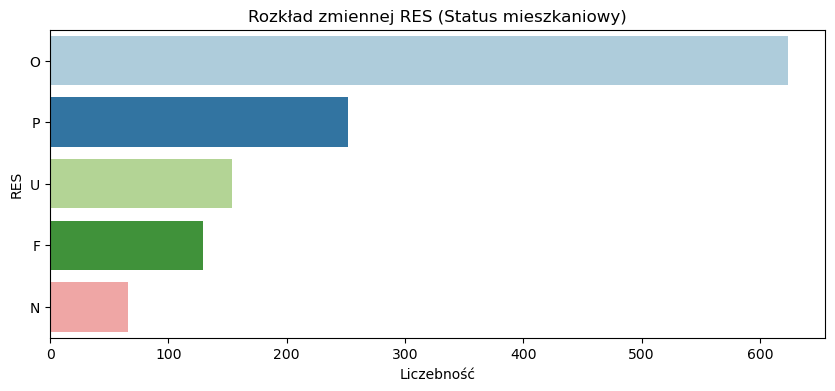

In [27]:
# Wizualizacja proporcji dla wybranych zmiennych kategorycznych (AES, RES)
plt.figure(figsize=(10, 4))
sns.countplot(y='AES', data=df, order=df['AES'].value_counts().index, palette = 'Paired')
plt.title('Rozkład zmiennej AES (Status zatrudnienia)')
plt.xlabel('Liczebność')
plt.ylabel('AES')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(y='RES', data=df, order=df['RES'].value_counts().index, palette = 'Paired')
plt.title('Rozkład zmiennej RES (Status mieszkaniowy)')
plt.xlabel('Liczebność')
plt.ylabel('RES')
plt.show()

In [28]:
df.describe()

,YOB,NKID,DEP,PHON,SINC,DAINC,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD,YOB_CLEANED
count,1225.000000,1225.000000,1225.000000,1225.000000,317.000000,1225.000000,594.000000,516.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,51.037551,0.623673,0.038367,0.903673,7690.391167,21244.211429,32365.279461,26650.139535,342.004898,121.926531,28.721633,39.595102,0.263673,52.466939
std,15.301818,1.016013,0.219917,0.295159,6734.561564,15896.207986,18629.554671,20884.191048,427.993865,839.639588,119.324084,168.697101,0.440804,12.690796
min,3.000000,0.000000,0.000000,0.000000,104.000000,0.000000,464.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,42.000000,0.000000,0.000000,1.000000,2700.000000,9000.000000,16928.000000,5312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,55.000000,0.000000,0.000000,1.000000,6000.000000,19500.000000,30464.000000,26464.000000,256.000000,0.000000,0.000000,0.000000,0.000000,55.000000
75%,63.000000,1.000000,0.000000,1.000000,10000.000000,30600.000000,48928.000000,46464.000000,528.000000,0.000000,0.000000,0.000000,1.000000,63.000000
max,99.000000,5.000000,2.000000,1.000000,50000.000000,64800.000000,64928.000000,64000.000000,3800.000000,28000.000000,1600.000000,2800.000000,1.000000,69.000000


##### Podstawowe statystyki opisowe:
- Średni wiek klientów (YOB_CLEANED) - około 52.5 roku; zakres po oczysczeniu od 19 do 69 lat; mediana - 55 lat
- Średnia liczba dzieci - 0.63, mediana 0; z wykresu wynika, że ponad połowa respondentów nie ma ani jednego dziecka (maksimum - pięcioro dzieci)
- DEP - tutaj prawie żaden respondent nie wskazał na obecność innych osób zaleznych (średnia 0.04)
- PHON - zdecydowana większość (ponad 90%) respondentów posiada telefon domowy
- SINC - średnie dochody małżonka wynosiły 7690 dolarów rocznie, mediana 6000 dolarów rocznie
- DAINC - średnie dochody respondenta wynosiły 21244 dolarów, mediana 19500 dolarów rocznie
- DHVAL - średnia wartość domu wynosiła 32365 dolary; mediana 30464 dolary
- DMORT - średnie saldo kredytu hipotecznego wynosiło 26650 dolary; mediana 26464 dolary
- DOUTM - średnie wydatki na raty wynosiły 342 dolary (rocznie?); mediana 256 dolary (rocznie?)
- DOUTL - średnie wydatki na pożyczki wynosiły 122 dolary; mediana 0 (czyli ponad 50% respondentów nie miało pożyczek)
- DOUTHOP - średnie wydatki na zakupy ratalne wynosiły 29 dolarów; mediana o dolarów (czyli ponad 50% respondentów nie miało wydatków na zakupy ratalne)
- DOUTCC - średnie wydatki na karty kredytowe wynosiły 40 dolarów; mediana 0 dolarów (czyli ponad 50% respondentów nie miało wydatków na karty kredytowe)
- RES - najwięcej jest właścicieli mieszkań (O) i osób mieszkających z rodzicami (P)
- AES - najwięcej osób jest zatrudnionych w sektorze prywatnym,  rządowym lub jest samozatrudnionych


Patrząc na rozkład zmiennej celu - BAD - widać, że około 26% respondentów okazało się ryzykownych, więc zbiór jest stosunkowo niezbilansowany (nierównowaga klas).

Nieliczne wartości odstające można zauważyć w przypadku zmiennych SINC oraz DOUTM.

##### Analiza korelacji

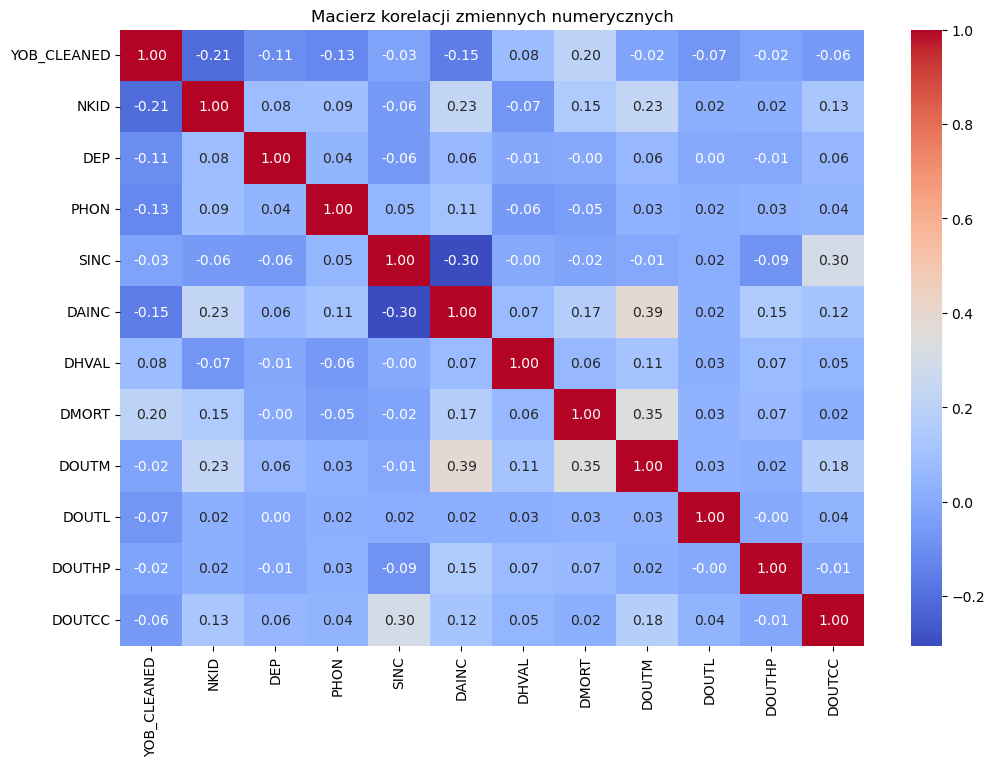

,YOB_CLEANED,NKID,DEP,PHON,SINC,DAINC,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC
YOB_CLEANED,1.000000,-0.211994,-0.105368,-0.126264,-0.025907,-0.154536,0.076844,0.204331,-0.019929,-0.073025,-0.023100,-0.056334
NKID,-0.211994,1.000000,0.079299,0.091520,-0.057927,0.226679,-0.071463,0.153109,0.227058,0.020242,0.020518,0.131070
DEP,-0.105368,0.079299,1.000000,0.044397,-0.061974,0.063766,-0.012653,-0.000776,0.057547,0.000378,-0.005166,0.055914
PHON,-0.126264,0.091520,0.044397,1.000000,0.049844,0.105437,-0.062808,-0.046677,0.029262,0.023681,0.026750,0.039777
SINC,-0.025907,-0.057927,-0.061974,0.049844,1.000000,-0.304680,-0.000323,-0.020528,-0.007188,0.015697,-0.085485,0.297783
DAINC,-0.154536,0.226679,0.063766,0.105437,-0.304680,1.000000,0.072172,0.170005,0.387851,0.017814,0.152765,0.115698
DHVAL,0.076844,-0.071463,-0.012653,-0.062808,-0.000323,0.072172,1.000000,0.060583,0.108490,0.025387,0.071724,0.047203
DMORT,0.204331,0.153109,-0.000776,-0.046677,-0.020528,0.170005,0.060583,1.000000,0.345667,0.031358,0.065054,0.022378
DOUTM,-0.019929,0.227058,0.057547,0.029262,-0.007188,0.387851,0.108490,0.345667,1.000000,0.032601,0.021425,0.176669
DOUTL,-0.073025,0.020242,0.000378,0.023681,0.015697,0.017814,0.025387,0.031358,0.032601,1.000000,-0.003113,0.039249


In [31]:
correlation_matrix = df[numeric_cols].corr()

# Wizualizacja macierzy korelacji przy użyciu Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Macierz korelacji zmiennych numerycznych')
plt.show()

correlation_matrix

Na ogół można zauważyć dosyć słabe korelacje - w większości są to korelacje ujemne. Nie powinno być problemu ze skorelowaniem zmiennych niezależnych.
Jeżeli chodzi o korelacje ze zmienną zależną, to zależności również są słabe, ale najsilniej zdaje się oddziaływać zmienna DAINC - można założyć, że im wyższy dochód, tym mniejsze prawdopodobieństwo bycia "ryzykownym" klientem.
Wśród zmiennych o pozytywnym wpływie na bycie ryzykownym klientem znajduje się zmienna DEP oraz DOUTL - im więcej osób zależnych w gospodarstwie domowym, tym większe prawdopodobieństwo bycia ryzykownym kientem oraz im wyzśze wydatki na pożyczki, tym większe prawdopodobieństwo bycia ryzykownym klientem.



## Część II - budowa modeli

Zaczynam od podziału zbioru na testowy i treningowy oraz od wyboru cech do modelu.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
## wybór zmiennych objaśniających i zmiennej objaśnianej
##ze względu na bardzo dużą ilość braków, odrzucam zmienne  DHVAL, DMORT, SINC

zm_objasniajace = ['YOB_CLEANED', 'NKID', 'DEP', 'PHON', 'DAINC', 'DOUTM', 'DOUTL', 'DOUTHP', 'DOUTCC']
zm_objasniana = 'BAD'

X = df[zm_objasniajace]
y = df[zm_objasniana]

In [45]:
##podział na zbiór testowy i treningowy - proporcje 80% trening, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [49]:
##kontrola - czy są brakujące wartości

missing_summary = X.isnull().sum()
missing_summary

YOB_CLEANED    0
NKID           0
DEP            0
PHON           0
DAINC          0
DOUTM          0
DOUTL          0
DOUTHP         0
DOUTCC         0
dtype: int64

Przejdę teraz do budowy lasu losowego

In [52]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [56]:
## predykcja i ocena modelu

y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep, conf_matrix

('              precision    recall  f1-score   support\n\n         0.0       0.79      0.89      0.84       180\n         1.0       0.53      0.32      0.40        65\n\n    accuracy                           0.74       245\n   macro avg       0.66      0.61      0.62       245\nweighted avg       0.72      0.74      0.72       245\n',
 array([[161,  19],
        [ 44,  21]], dtype=int64))

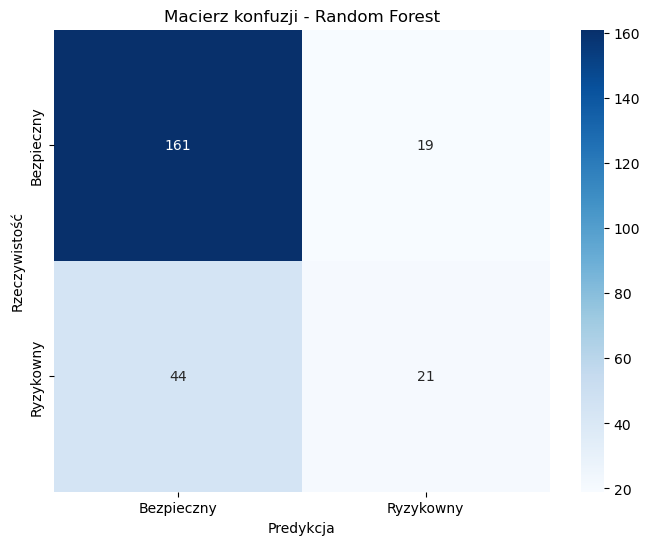

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bezpieczny', 'Ryzykowny'], yticklabels=['Bezpieczny', 'Ryzykowny'])
plt.title('Macierz konfuzji - Random Forest')
plt.xlabel('Predykcja')
plt.ylabel('Rzeczywistość')
plt.show()

Model klasyczny Random Forest osiągnął następujące wyniki na zestawie testowym:

- Dokładność (accuracy): 74% - czyli 74% obserwacji zostaje poprawnie zaklasyfikowanych
- Czułość (sensitivity): 79% - czyli 79% obserwacji zostało poprawnie zaklasyfikowanych do klasy pozytywnej
- Specyficzność (specificity): 53% - czyli 53% obserwacji zostało poprawnie zaklasyfikowanych do klasy negatywnej
- Precyzja (precision): 90% - czyli 90% obserwacji zaklasyfikowanych do klasy pozytywnej zostało poprawnie zaklasyfikowanych

Podsumowując, model dobrze radzi sobie z wykrywaniem "ryzykownych" klientów, ale zbyt często z kolei klasyfikuje bezpiecznych klientów jako ryzykownych.

## Model kwantowy

### Przygotowanie modelu kwantowego

#### Transformacja danych
- W przypadku modelu kwantowego, dane muszą być przygotowane w formie wektorów odpowiednich do kodowania kwantowego
- Zredukuję też liczbę cech do 2-3

#### Wybrany ansatz
Użyję Quantum Variational Classifier (QVC) opierającego się na obwodach kwantowych z warstwami parametrów rotacji i sprzężeń między kubitami. Popularnym wyborem jest ansatz z rotacjami R_y i bramkami kontrolowanymi (CNOT), który jest wystarczająco elastyczny do klasyfikacji binarnej.

#### Symulacja kwantowa
Skorzystam z symulatora kwantowego z biblioteki Pennylane, ponieważ bez komputera kwantowego uzyskanie wyników jest możliwe tylko w środowisku symulacyjnym.

### Redukcja wymiarów za pomocą PCA
Aby przygotować dane do modelu kwantowego, najpierw zredukuję je do dwóch cech za pomocą analizy głównych składowych (PCA)

In [99]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2) ##do dwóch głównych składowych
X_reduced = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
print("Wyjaśniona wariancja przez dwie składowe:", explained_variance)

Wyjaśniona wariancja przez dwie składowe: [0.99644146 0.00277963]


In [107]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1)) ##przeskalowanie danych w zakresie [-1,1]
X_scaled = scaler.fit_transform(X_reduced)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=10)

##ustalam parametry modelu
num_qubits = 2  ## liczba kubitów odpowiadająca liczbie cech
num_layers = 3  ## liczba warstw w ansatzie

## definiowanie urządzenia kwantowego
dev = qml.device("default.qubit", wires=num_qubits)

##obwód kwantowy
def quantum_circuit(params, x):
    qml.templates.AngleEmbedding(x, wires=range(num_qubits), rotation="Y")
    qml.templates.BasicEntanglerLayers(params, wires=range(num_qubits)) ##wcześniej korzystałam z StronglyEntanglingLayers ale BasicEntanglerLayers powinno lepiej działać dla małych zbiorów

@qml.qnode(dev)
def circuit(params, x):
    quantum_circuit(params, x)
    return qml.expval(qml.PauliZ(0)) 

# definiowanie funkcji predykcji
def predict(params, X):
    predictions = []
    for x in X:
        result = circuit(params, x)
        predictions.append(1 if result > 0 else 0) 
    return np.array(predictions)

# definiowanie funkcji kosztu
def cost(params, X, y):
    X = np.array(X)
    y = np.array(y)
    predictions = np.array([circuit(params, x) for x in X])
    return np.mean((predictions - y) ** 2)

# Inicjalizacja parametrów
params = np.random.uniform(0, np.pi, (num_layers, num_qubits))

# optymalizacja parametrów za pomocą optymalizatora Adam
opt = qml.AdamOptimizer(stepsize=0.01)
epochs = 100

for epoch in range(epochs):
    params = opt.step(lambda p: cost(p, X_train, y_train), params)
    if epoch % 10 == 0:
        train_loss = cost(params, X_train, y_train)
        print(f"Epoch {epoch}: Loss = {train_loss:.4f}")

# predykcja
y_pred = predict(params, X_test)

# wyniki
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 0: Loss = 0.3897
Epoch 10: Loss = 0.3493
Epoch 20: Loss = 0.3201
Epoch 30: Loss = 0.3032
Epoch 40: Loss = 0.2874
Epoch 50: Loss = 0.2772
Epoch 60: Loss = 0.2704
Epoch 70: Loss = 0.2668
Epoch 80: Loss = 0.2652
Epoch 90: Loss = 0.2646

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.42      0.55       184
         1.0       0.27      0.66      0.38        61

    accuracy                           0.48       245
   macro avg       0.53      0.54      0.47       245
weighted avg       0.66      0.48      0.51       245



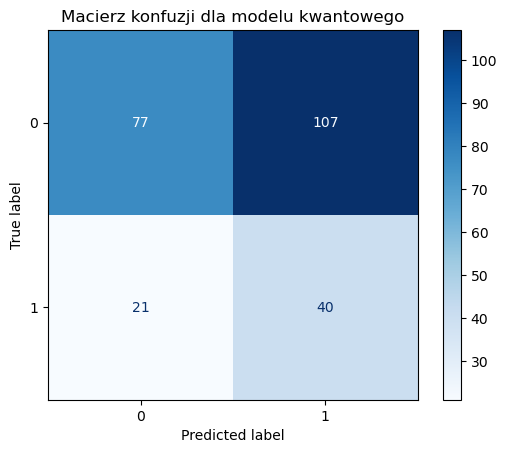

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

# Wyświetlenie macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Macierz konfuzji dla modelu kwantowego")
plt.show()

Jest to juz model który osiągnęłam po wprowadzeniu kilku poprawek, tj. wprowadzenie skalowania danych wejściowych (MinMaxScaler), zmiana ansatzu z StronglyEntanglingLayers na BasicEntanglerLayers, zmian

Model kwantowy osiągnął następujące wyniki na zestawie testowym:

- Dokładność (accuracy): 48% - czyli 48% obserwacji zostaje poprawnie zaklasyfikowanych
- Czułość (sensitivity): 66% - czyli 66% obserwacji zostało poprawnie zaklasyfikowanych do klasy pozytywnej
- Specyficzność (specificity): 42% - czyli 42% obserwacji zostało poprawnie zaklasyfikowanych do klasy negatywnej
- Precyzja (precision): 27% - czyli 27% obserwacji zaklasyfikowanych do klasy pozytywnej zostało poprawnie zaklasyfikowanych

Ten model osiągnął dużo gorsze wyniki na zbiorze testowym pod względem metryk jakości.

Przedstawię jeszcze porównanie krzywej ROC i AUC dla obydwu modeli:

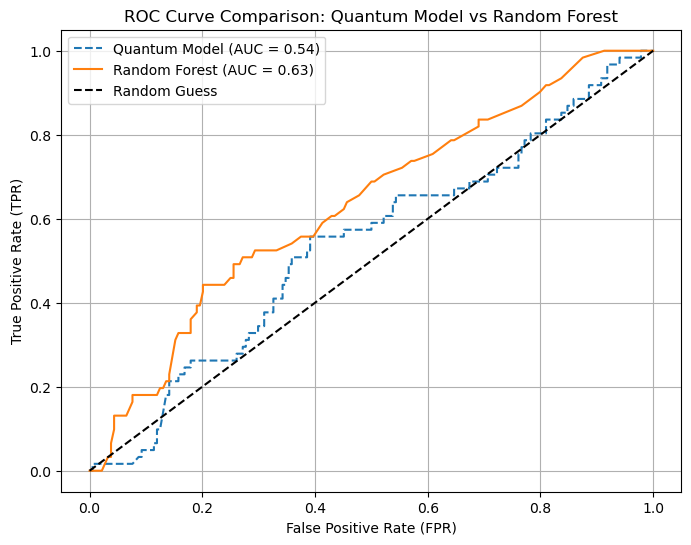

In [116]:
from sklearn.metrics import roc_curve, auc, classification_report

def predict_proba(params, X):
    probas = []
    for x in X:
        result = circuit(params, x)
        probas.append((1 + result) / 2)  # przeskalowanie z [-1, 1] do [0, 1]
    return np.array(probas)

y_pred_proba_q = predict_proba(params, X_test)

# Model klasyczny RandomForest
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, y_train)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # prawdopodobieństwo dla klasy 1

# Obliczanie krzywych ROC
fpr_q, tpr_q, _ = roc_curve(y_test, y_pred_proba_q)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# Obliczanie AUC
auc_q = auc(fpr_q, tpr_q)
auc_rf = auc(fpr_rf, tpr_rf)

# Rysowanie krzywych ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_q, tpr_q, label=f"Quantum Model (AUC = {auc_q:.2f})", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Quantum Model vs Random Forest")
plt.legend()
plt.grid()
plt.show()

Jak widać, okazało się, że model kwantowy jest niewiele skuteczniejszy od modelu losowego, a las losowy wypadł w tym przypadku nieco lepiej (AUC = 0.63).

Podsumowując - budowa modelu kwantowego jest skomplikowanym zadaniem wymagajacym dostrojenia wielu parametrów i wyboru wielu różnych składowych takich jak rodzaj optymalizatora czy liczba kubitów, więc zbudowanie dobrego i skutecznego modelu wymaga wprawy, ale domyślam się że finalnie efekt może być dużo lepszy niż w przypadku modelu klasycznego :)